# Premier League Club Analysis for Investment (Exploratory Data Analysis)
**Domain: Sports**

**Context:**
    
A renowned investment firm typically invests in top-tier sports teams with significant potential. The dataset in their possession contains crucial information about all the clubs that have participated in the Premier League, and it is assumed to include data for all the clubs. The dataset includes information on the number of goals scored by each team, the frequency of their finishes in the top two positions, and other relevant details.

**Data:**
Premier League Final Data.csv- : The provided dataset encompasses comprehensive information on all football clubs that have participated in the English Premier League tournaments.

**Data Dictionary:**

* Club: Name of the football club
* Matches: Number of matches played by the club in the Premier League
* Wins: Number of matches won by the club in the Premier League
* Loss: Number of matches lost by the club in the Premier League
* Draws: Number of matches drawn by the club in the Premier League
* Clean Sheets: Number of matches in which the club prevented the opposing side from scoring
* Team Launch: The Year in which the club was founded
* Winners: Number of times the club has won the Premier League
* Runners-up: Number of times the club has finished as runner-up in the Premier League
* lastplayed_pl: The Year in which the team last played in the Premier League

**Project Objective**

The management of the firm aims to invest in one of the top-performing club in the English Premier League. To facilitate their decision-making process, a comprehensive report on the performance of various clubs can be created. However, some of the more established clubs have already been acquired by competitors. Consequently, the firm wishes to identify clubs they can approach and potentially invest in, ensuring a successful and profitable deal.

*Note*

*- Unauthorised use or distribution of this project is prohibited @dataanalystduo*

*- Dataset has been acquired from  multiple sources on the internet. Credits for the dataset go to the original creator of the data*

*- This data is updated as of March'23*


In [1]:
import numpy as np
import pandas as pd

In [5]:
# loading the dataset in to python
data=pd.read_csv(r"C:\Users\Sagana\Desktop\TECH Malar\DataToDestiny\PROJECTS\EDA project\premier_league_final_data.csv")

### Data Exploration and Cleaning

In [6]:
data.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,1Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,2Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,3Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,5Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12


In [7]:
data.tail()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
35,36West Bromwich Albion,494,117,238,139,510,107,1878,NaN,0,Apr-18
36,37West Ham United,1025,343,423,259,1262,266,1895,NaN,0,Apr-23
37,38Wigan Athletic,304,85,143,76,316,73,1932,NaN,0,Apr-13
38,39Wolverhampton Wanderers,334,98,151,85,353,75,1877,0.0,0,Apr-23
39,40Portsmouth,266,79,122,65,292,61,April 1898,NaN,NaN,Apr-10


In [8]:
data.shape

(40, 11)

The dataset contains 11 columns giving information about 40 different football clubs and their performance over the years in the English Premier League. By observing some columns of the dataset it is noted that there exists the following inconsistencies:

1) column 'club' has numbers attached before the club names.
2) Values in 'Team launch' column is not consistent with 2 differnet format.  
3) 'winners' and 'runners-up' columns contain missing values.
4) Information about month in which the team last played in the PL given along with year in the 'lastplayed_pl' column seems unnecessary, whereas the year in which the team last appeared in the PL is important for anlaysis. Data need to be converted in to year alone format in this column.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            40 non-null     object 
 1   Matches Played  40 non-null     int64  
 2   Win             40 non-null     int64  
 3   Loss            40 non-null     int64  
 4   Drawn           40 non-null     int64  
 5   Goals           40 non-null     int64  
 6   Clean Sheets    40 non-null     int64  
 7   TeamLaunch      40 non-null     object 
 8   Winners         25 non-null     float64
 9   Runners-up      22 non-null     object 
 10  lastplayed_pl   40 non-null     object 
dtypes: float64(1), int64(6), object(4)
memory usage: 3.6+ KB


We also notice that the data type for the "Runners-up" column is non-numeric (i.e., object type). To perform any numerical analysis on this column, we will need to convert it to a numeric data type.

In [10]:
data['Winners'].value_counts()

Winners
0.0     18
1.0      3
3.0      1
5.0      1
6.0      1
13.0     1
Name: count, dtype: int64

Premier league happens every year since 1992 and the dataset contains information till 2022. 'Winners' column exhibits the number of times that particular club has won the premier league over the past 30 years. It is given that 3 clubs won once, one club won thrice, another won five times, one won six times, and one club emerged victorious a remarkable 13 times. Total number of times different teams have won is 30 i.e 30 winners in 30 Premier League. This means the missing values in this column refer to nothing, Therefore all these null values can be replaced with zeroes.

In [11]:
#Copy of the dataset is being used for data cleaning and analysis

data_new=data.copy()

In [12]:
#replacing null values with zeroes in winners column
data_new['Winners'].fillna(0,inplace=True)

In [13]:
data_new['Winners'].isnull().any()

False

In [14]:
data_new['Winners'].tail()

35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
Name: Winners, dtype: float64

In [15]:
data_new['Runners-up'].value_counts()

Runners-up
0    10
1     3
-     3
6     1
4     1
5     1
3     1
7     1
2     1
Name: count, dtype: int64

Similar to the 'winners' column, the 'Runners-up' column shows the number of times that club has been a runner-up in the premier league over the past 30 years. Three clubs became runners-up once and another has been a runner-up 7 times, such that 30 runners-up in the 30 Premier League conducted. So null values and an iphen can be replaced with zeroes in this column
Data type of this column is also need to be changed into int type from object type.

In [18]:
#replacing null values and '-' in the runners-up column with zeroes

data_new['Runners-up'].fillna(0,inplace=True)
data_new['Runners-up'].replace('-',0,inplace=True)

In [19]:
data_new['Runners-up'].value_counts()

Runners-up
0    21
0    10
1     3
6     1
4     1
5     1
3     1
7     1
2     1
Name: count, dtype: int64

In [20]:
data_new['Runners-up'].isnull().any()

False

In [22]:
#converting the "Runners-up" column from an "Object" data type to an "Int64" data type.

data_new['Runners-up']=pd.to_numeric(data_new['Runners-up'])
data_new['Runners-up']=data_new['Runners-up'].astype('int64')

In [23]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            40 non-null     object 
 1   Matches Played  40 non-null     int64  
 2   Win             40 non-null     int64  
 3   Loss            40 non-null     int64  
 4   Drawn           40 non-null     int64  
 5   Goals           40 non-null     int64  
 6   Clean Sheets    40 non-null     int64  
 7   TeamLaunch      40 non-null     object 
 8   Winners         40 non-null     float64
 9   Runners-up      40 non-null     int64  
 10  lastplayed_pl   40 non-null     object 
dtypes: float64(1), int64(7), object(3)
memory usage: 3.6+ KB


In [24]:
# removing numerals from club names
data_new['Club']=data_new['Club'].str.replace('\d+','')

In [25]:
data_new['Club'].head()

0             1Arsenal
1         2Aston Villa
2     3Birmingham City
3    4Blackburn Rovers
4    5Bolton Wanderers
Name: Club, dtype: object

In [26]:
from string import digits

In [27]:
data_new['Club']=data_new['Club'].str.lstrip(digits)

In [28]:
data_new['Club'].head()

0             Arsenal
1         Aston Villa
2     Birmingham City
3    Blackburn Rovers
4    Bolton Wanderers
Name: Club, dtype: object

In [29]:
data_new['Club'].tail()

35       West Bromwich Albion
36            West Ham United
37             Wigan Athletic
38    Wolverhampton Wanderers
39                 Portsmouth
Name: Club, dtype: object

Using lstrip() function numerals attached to the names of the clubs are removed.

In [30]:
data_new['TeamLaunch'].value_counts()

TeamLaunch
1878           3
1886           2
1905           2
1874           2
1892           2
1879           2
1884           2
1882           2
1875           2
1895           1
1881           1
1904           1
1932           1
1912           1
1863           1
1877           1
1885           1
1867           1
1889           1
1894           1
1865           1
1902           1
1876           1
1919           1
16 Oct 1878    1
1861           1
Aug 1883       1
1901           1
1899           1
April 1898     1
Name: count, dtype: int64

In [31]:
#converting values into date-time format
data_new['TeamLaunch']=pd.to_datetime(data_new['TeamLaunch'], errors='coerce')
data_new['TeamLaunch'].value_counts()

TeamLaunch
1878-01-01    3
1886-01-01    2
1905-01-01    2
1874-01-01    2
1892-01-01    2
1879-01-01    2
1884-01-01    2
1882-01-01    2
1875-01-01    2
1881-01-01    1
1889-01-01    1
1895-01-01    1
1912-01-01    1
1932-01-01    1
1863-01-01    1
1885-01-01    1
1867-01-01    1
1894-01-01    1
1904-01-01    1
1865-01-01    1
1902-01-01    1
1876-01-01    1
1919-01-01    1
1861-01-01    1
1901-01-01    1
1899-01-01    1
1877-01-01    1
Name: count, dtype: int64

In [32]:
#converting values in to'YYYY' format
data_new['TeamLaunch']=data_new['TeamLaunch'].dt.strftime('%Y')
data_new['TeamLaunch'].value_counts()

TeamLaunch
1878    3
1886    2
1905    2
1874    2
1892    2
1879    2
1884    2
1882    2
1875    2
1881    1
1889    1
1895    1
1912    1
1932    1
1863    1
1885    1
1867    1
1894    1
1904    1
1865    1
1902    1
1876    1
1919    1
1861    1
1901    1
1899    1
1877    1
Name: count, dtype: int64

'Team launch' column values are converted into a single standard format with only years mentioned.

In [33]:
# extracting only the year in lastplayed_pl column

data_new['lastplayed_pl']=(pd.to_datetime(data_new['lastplayed_pl'],format='%b-%y', errors='coerce')).dt.year

In [34]:
data_new['lastplayed_pl'].value_counts()

lastplayed_pl
2023    19
2022     3
2017     3
2018     3
2012     2
2011     1
2007     1
2001     1
2008     1
2002     1
2015     1
2021     1
2000     1
2013     1
2010     1
Name: count, dtype: int64

'lastplayed_pl' column now indicates the year in which each club last appeared in the premier league.

### Data Analysis

In [35]:
data_new.describe()

,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,Winners,Runners-up,lastplayed_pl
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,573.750000,215.450000,210.425000,147.875000,769.000000,167.925000,0.750000,0.750000,2018.000000
std,358.986519,194.164608,102.132364,88.873632,627.746478,135.561584,2.372384,1.750458,6.876195
min,190.000000,41.000000,85.000000,48.000000,181.000000,45.000000,0.000000,0.000000,2000.000000
25%,275.000000,80.500000,127.500000,71.500000,304.500000,66.000000,0.000000,0.000000,2014.500000
50%,443.000000,116.500000,193.500000,120.000000,462.000000,104.000000,0.000000,0.000000,2022.000000
75%,934.750000,295.750000,263.000000,222.000000,1142.750000,244.250000,0.000000,0.000000,2023.000000
max,1182.000000,720.000000,429.000000,329.000000,2229.000000,491.000000,13.000000,7.000000,2023.000000


Average matches played is 573 and average goals scored is 769. Median of goals scored is 462 which shows some clubs have scored significantly higher goals compared to other clubs.

75% of the clubs have neither won nor qualified for the finals even once over. However performance of these clubs also need to be analysed irrespective of their past failures because of 2 reasons. one, 25% top performers might already be owned by competitive firms and two, one of these clubs might have the potential to succeed in further leagues after investing in them.  

In [36]:
data_new[data_new['Winners']==13]['Club']

20    Manchester United
Name: Club, dtype: object

Manchester United has been a winner for 13 times.

In [37]:
data_new[data_new['Runners-up']==7]['Club']

20    Manchester United
Name: Club, dtype: object

The same Manchester United club has been a runner-up for 13 times.

In [40]:
data_new[data_new['Club']=='Manchester United']

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
20,Manchester United,1181,720,199,262,2229,491,1878,13.0,7,2023


Manchester United is clearly the top most performing club which probably be owned by a competing firm.

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Matches played')

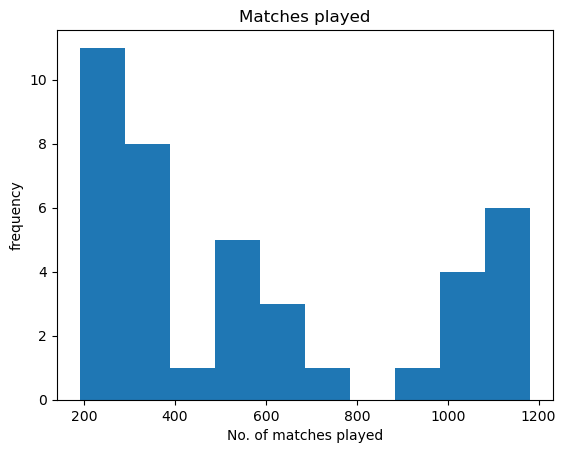

In [42]:
# plotting histogram of number of matches played 

plt.hist(data_new['Matches Played'])
plt.xlabel('No. of matches played')
plt.ylabel('frequency')
plt.title('Matches played')

This histogram shows that majority of the teams have played 200 to 400 matches and some teams have played more than 800 matches. 
While teams that have played 1000+ matches would be more experienced and established, they are not the clubs this firm is wanting to invest, Hence these clubs can be removed from our analysis. 

In [44]:
data_new[data_new['Matches Played']>=900]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6,2023
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,2023
9,Chelsea,1182,628,261,293,2002,473,1905,5.0,4,2023
13,Everton,1182,424,429,329,1515,357,1878,0.0,0,2023
18,Liverpool,1182,621,270,291,2071,453,1892,1.0,5,2023
19,Manchester City,991,494,283,214,1733,344,1894,6.0,3,2023
20,Manchester United,1181,720,199,262,2229,491,1878,13.0,7,2023
22,Newcastle United,1063,397,391,275,1426,280,1892,0.0,2,2023
29,Southampton,916,280,390,246,1103,237,1885,0.0,0,2023
33,Tottenham Hotspur,1182,518,378,286,1800,339,1882,0.0,1,2023


As the team with potential to suceed in the future need to be identified, its better to remove the teams that are more experienced. 

In [45]:
data_new=data_new[data_new['Matches Played']<900].reset_index(drop=True)

In [46]:
data_new.shape

(29, 11)

Now our dataset is reduced to 29 clubs. 

In [47]:
data_new.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023


To compare the performances of these clubs, percentage of win, loss, draw and clean sheets can be calculated and stored in new columns. Average goals per match of each team is also required for analysis.

In [51]:
#calculating new metrics and storing in new columns
data_new['winning_rate']= (data_new['Win']/data_new['Matches Played'])*100

data_new['loss_rate']= (data_new['Loss']/data_new['Matches Played'])*100

data_new['draw_rate']= (data_new['Drawn']/data_new['Matches Played'])*100

data_new['cleansheet_rate']= (data_new['Clean Sheets']/data_new['Matches Played'])*100

In [52]:
data_new['Average_goals']=data_new['Goals']/data_new['Matches Played']
data_new['Average_goals']=data_new['Average_goals'].round()

In [53]:
data_new.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,winning_rate,loss_rate,draw_rate,cleansheet_rate,Average_goals
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0


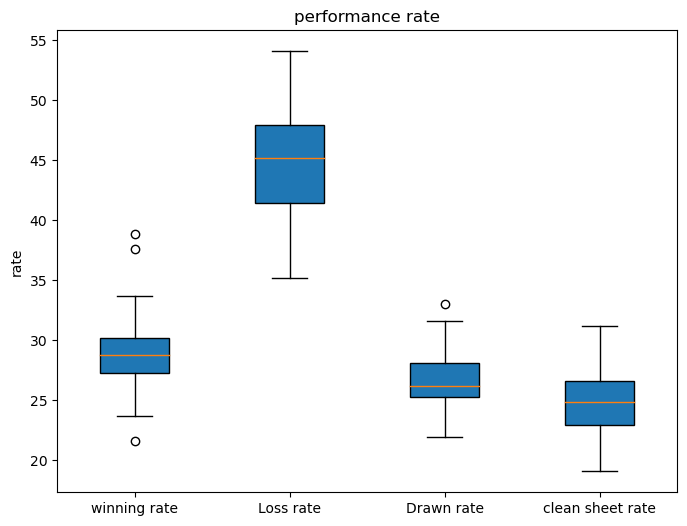

In [54]:
# boxplot of winning, loss and drawn rates

plt.figure(figsize=(8,6))
plt.boxplot([data_new['winning_rate'],data_new['loss_rate'],data_new['draw_rate'],data_new['cleansheet_rate']],
            patch_artist=True,
            labels=['winning rate','Loss rate','Drawn rate','clean sheet rate'])
plt.title('performance rate') 
plt.ylabel('rate')

plt.show()

2 of these teams have very high winning rates. overall loss rate of teams are higher than winning rate. one team has high drawn rate, but impact of drawn rate depends on winning or lossing rates of that particular club.

It is helpful for further analysis to know which are the clubs that have the highest winning rates and the one club that has the lowest winning rate.

In [55]:
#2 clubs with highest winning rates

Q1=data_new['winning_rate'].quantile(0.25)
Q3=data_new['winning_rate'].quantile(0.75)
IQR=Q3-Q1

upper_bound=Q3+ (1.5*IQR)
data_new[data_new['winning_rate']> upper_bound]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,winning_rate,loss_rate,draw_rate,cleansheet_rate,Average_goals
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
12,Leeds United,574,223,202,149,784,179,1919,0.0,0,2023,38.850174,35.191638,25.958188,31.184669,1.0


Blackburn Rovers and Leeds United are the clubs with the highest winning rates above 37%.

In [56]:
#one club with lowest winning rate

lower_bound=Q1-(1.5*IQR)
data_new[data_new['winning_rate']<lower_bound]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,winning_rate,loss_rate,draw_rate,cleansheet_rate,Average_goals
17,Hull City,190,41,101,48,181,58,1904,0.0,0,2017,21.578947,53.157895,25.263158,30.526316,1.0


Hull city is the club with the least winning rate.

In [57]:
#club with highest upper bound

q1=data_new['draw_rate'].quantile(0.25)
q3=data_new['draw_rate'].quantile(0.75)
IQR=q3-q1

upper_bound=q3+ (1.5*IQR)
high_rate=data_new[data_new['draw_rate']> upper_bound]
high_rate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,winning_rate,loss_rate,draw_rate,cleansheet_rate,Average_goals
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0


Brighton & Hove Albion club has the highest drawn rate at 33% and with nearly 28% winning rate.

In [58]:
data_new['Average_goals'].describe()

count    29.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: Average_goals, dtype: float64

Standard deviation is zero in Average goals column, which means there is no spread in data. No inference can be made from this data. 

In [59]:
data_new['Winners'].value_counts()

Winners
0.0    27
1.0     2
Name: count, dtype: int64

In [60]:
data_new['Runners-up'].value_counts()

Runners-up
0    28
1     1
Name: count, dtype: int64

Only 2 clubs have emerged has winners once and 1 club has been a runner-up in this updated data.

In [61]:
data_new[(data_new['Winners']==True) | (data_new['Runners-up']==True)]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,winning_rate,loss_rate,draw_rate,cleansheet_rate,Average_goals
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
13,Leicester City,642,216,262,164,860,167,1884,1.0,0,2023,33.644860,40.809969,25.545171,26.012461,1.0


Blackburn Rovers club has won and been a runner-up once. Leicester City	has won once.

In [62]:
data_new['Matches Played'].describe()

count     29.000000
mean     372.482759
std      153.533296
min      190.000000
25%      266.000000
50%      305.000000
75%      494.000000
max      696.000000
Name: Matches Played, dtype: float64

Average matches played by these 29 teams is 372

In [63]:
data_new['lastplayed_pl'].value_counts()

lastplayed_pl
2023    8
2022    3
2017    3
2018    3
2012    2
2011    1
2007    1
2001    1
2008    1
2002    1
2015    1
2021    1
2000    1
2013    1
2010    1
Name: count, dtype: int64

Only 8 of these 29 have played in 2023 and there are some clubs whose last played years is 2021/2022. 
Prioritizing these teams in the analysis.

In [64]:
data_new[data_new['lastplayed_pl']==2023]['Club']

3                 Bournemouth
4      Brighton & Hove Albion
8              Crystal Palace
10                     Fulham
12               Leeds United
13             Leicester City
16          Nottingham Forest
27    Wolverhampton Wanderers
Name: Club, dtype: object

Giving more priority to teams that have more recent experience playing in the Premier League is ideal. When making the final decision, we will assign higher weight to teams that have played more recently, and lesser weight to those that have not played recently.

### Final Recommendations Framework


To ensure better comparison among teams, Let's Score each team on the pre defined metrics.

* Give a score of 10 if club have a relatively high experience in the Premier League above average (372)
* Give a score of 15 if club has a winning rate above Q3
* Give a score of 15 if club has a losing rate below Q1
* Give a score of 10 if club has a drawn rate below Q1 and a losing rate below Q1
* Give a score of 10 if club has a clean sheet above Q3 and a winning rate above Q3
* Give a score of 15 if club has won the premier league
* Give a score of 10 if club has been a runner-up in the premier league
* Give a score of 15 if club has been currently playing in the premier league

In [65]:
# upper_bound_winningrate -> winning rate above Q3 
upper_bound_winningrate=data_new['winning_rate'].quantile(0.75)

# lower_bound_lossrate -> loss rate below Q1
lower_bound_lossrate=data_new['loss_rate'].quantile(0.25)

# lower_bound_drawrate -> drawn rate below Q1
lower_bound_drawrate=data_new['draw_rate'].quantile(0.25)

# upper_bound_cleansheetrate ->  clean sheet rate above Q3
upper_bound_cleansheetrate=data_new['cleansheet_rate'].quantile(0.75)

In [67]:
# Creating a new column 'score' with zeroes as values
data_new['score']=np.zeros(len(data_new))

In [68]:
data_new.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,winning_rate,loss_rate,draw_rate,cleansheet_rate,Average_goals,score
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0,0.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0,0.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0,0.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0,0.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0,0.0


In [69]:
# Giving scores based on the conditions
data_new.loc[data_new['Matches Played']>=372,'score']+=10

data_new.loc[data_new['winning_rate'] >= upper_bound_winningrate,'score'] +=15

data_new.loc[data_new['loss_rate']<= lower_bound_lossrate,'score'] +=15

data_new.loc[(data_new['draw_rate']<= lower_bound_drawrate) & (data_new['loss_rate']<=lower_bound_lossrate),'score']+=10

data_new.loc[(data_new['cleansheet_rate']>= upper_bound_cleansheetrate) & (data_new['winning_rate']>=upper_bound_winningrate),'score']+=10

data_new.loc[data_new['Winners']==True,'score']+=15

data_new.loc[data_new['Runners-up']==True,'score']+=10

data_new.loc[data_new['lastplayed_pl']== 2023,'score']+=15


In [70]:
# sort the data based on scores to plot 
data_new_sorted=data_new.sort_values(by='score',ascending=False)

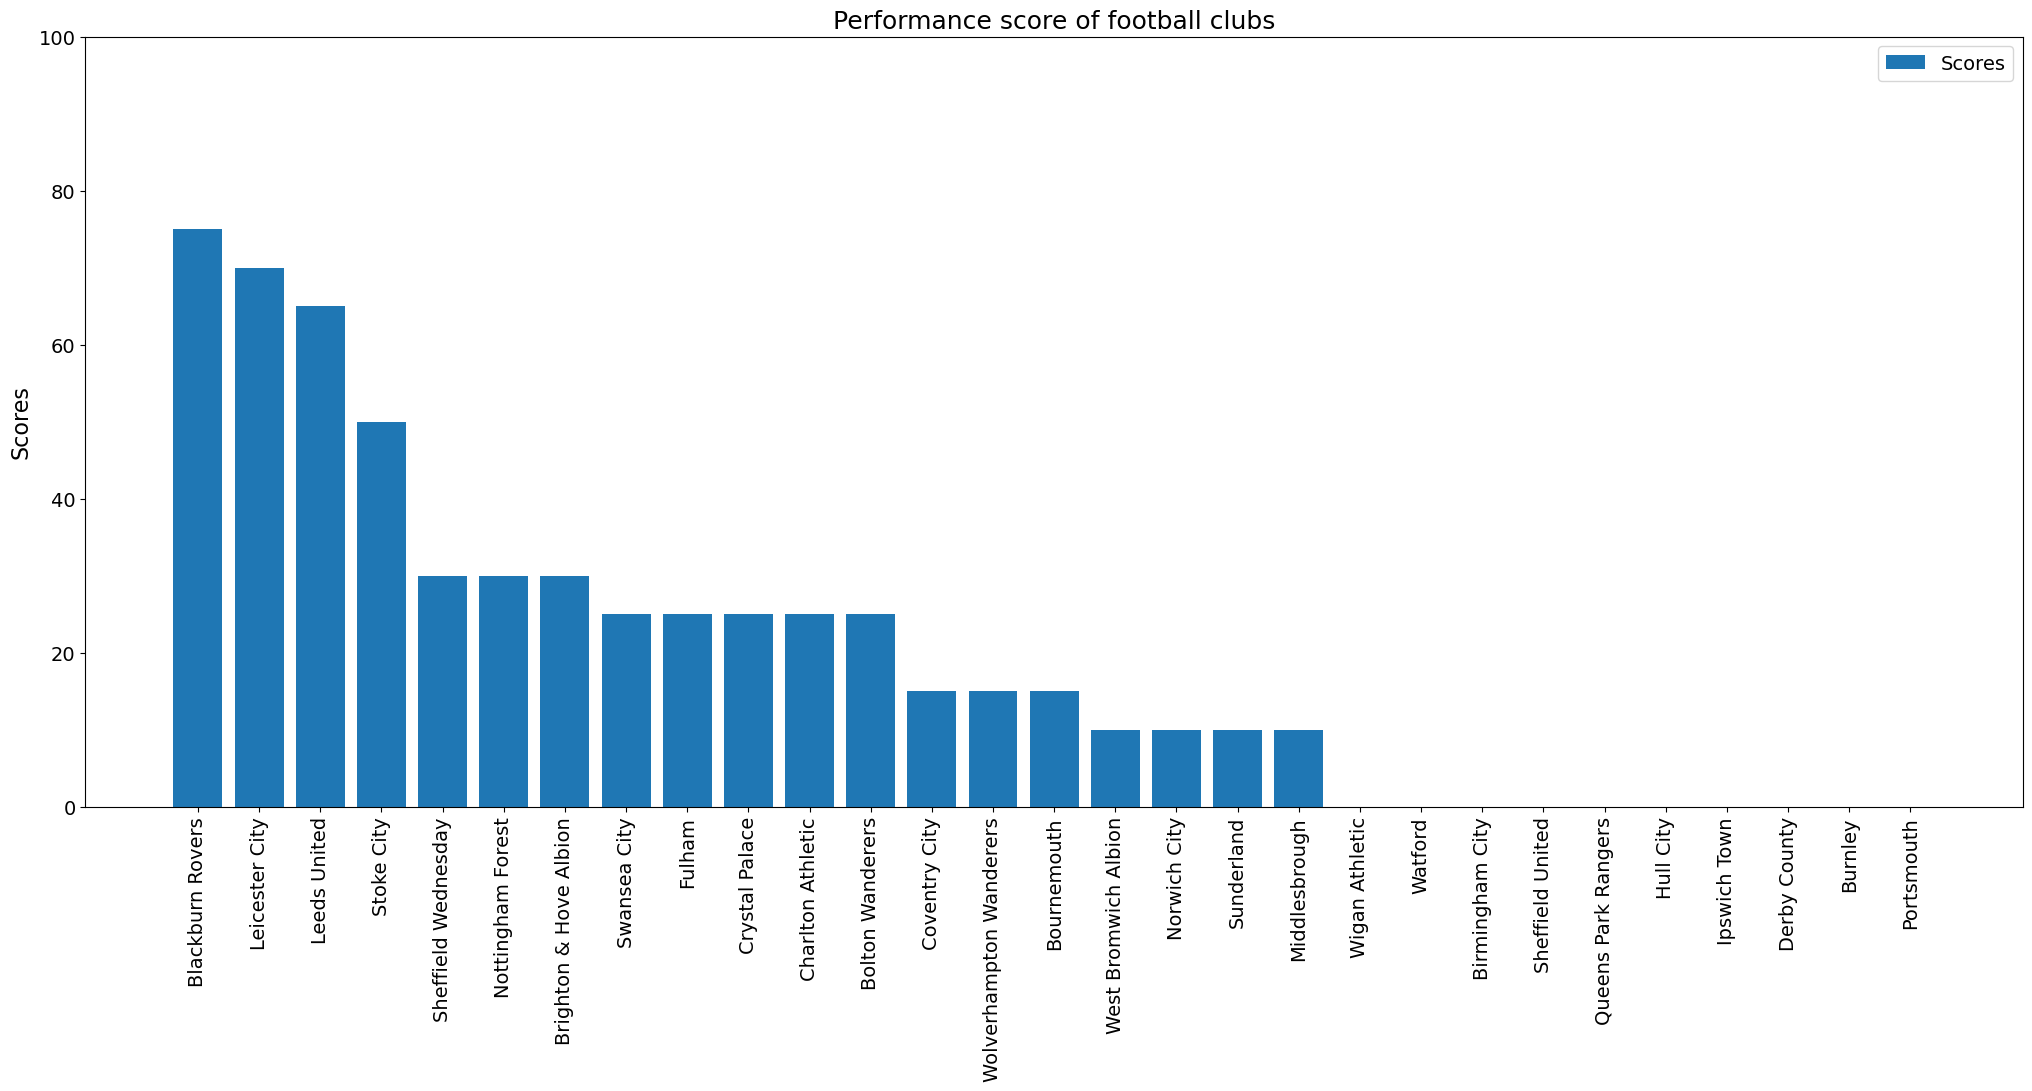

In [71]:
# bar graph of teams based on their scores

plt.figure(figsize=(25,10))

plt.bar(data_new_sorted['Club'],data_new_sorted['score'])

plt.title('Performance score of football clubs', fontsize=18)
plt.ylabel('Scores', fontsize=16)
plt.legend(['Scores'], fontsize=14)

plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(0, 100)

plt.show()

#### Blackburn Rovers and Leicester city are the top performing clubs based on the scoring.

Lets look at the performance of these 2 clubs

In [77]:
data_new[(data_new['Club']=='Blackburn Rovers') | (data_new['Club']=='Leicester City')]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,winning_rate,loss_rate,draw_rate,cleansheet_rate,Average_goals,score
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0,75.0
13,Leicester City,642,216,262,164,860,167,1884,1.0,0,2023,33.644860,40.809969,25.545171,26.012461,1.0,70.0


By observing the data of 2 clubs, Blackburn Rovers club was last active in the year 2012. Though its performance was high, this club cannot be recommended.

Lets check the better scoring clubs that are active in the last 3 years.

In [79]:
# updating the dataset with last played years after 2020
data_sort=data_new[(data_new['lastplayed_pl']==2023) | (data_new['lastplayed_pl']==2022) |
                   (data_new['lastplayed_pl']==2021)].sort_values(by='score',ascending=False)

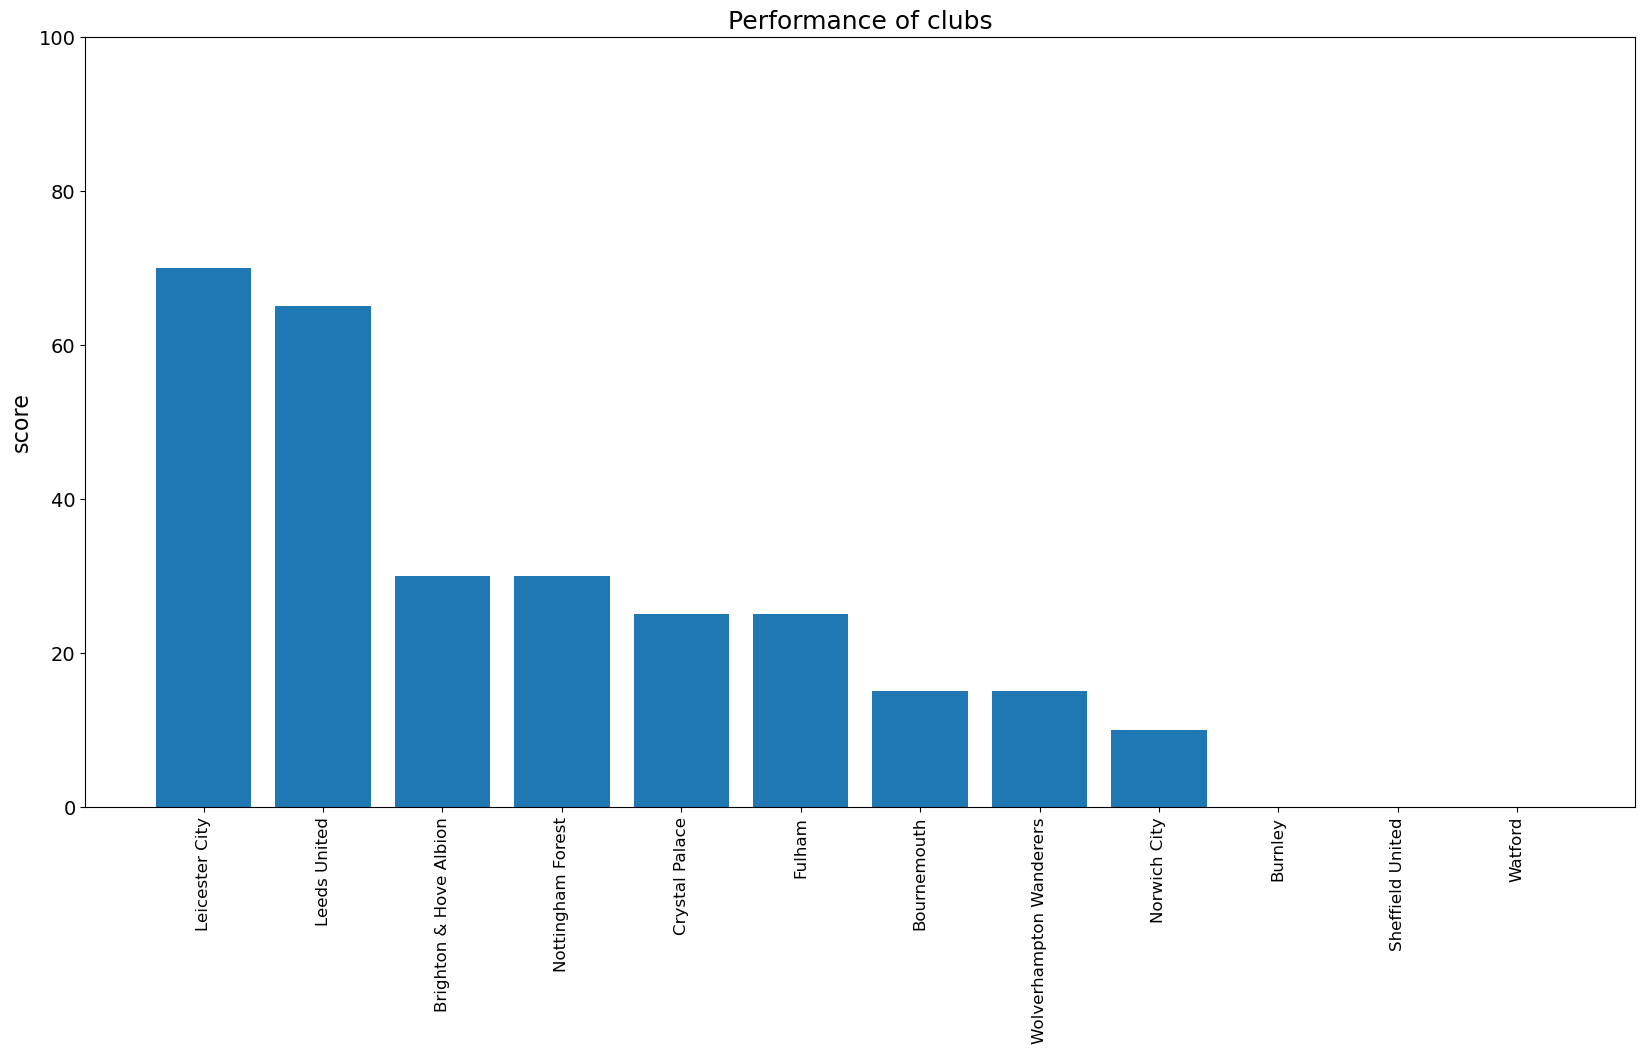

In [81]:
#Bar graph of teams that are recently active with their scores 
plt.figure(figsize=(20,10))
plt.bar(data_sort['Club'],data_sort['score'])

plt.title('Performance of clubs', fontsize=18)
plt.ylabel('score',fontsize=16)

plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=14)

plt.ylim(0,100)

plt.show()

### Recommendation
* Therefore, the recommendation is to consider investing in Leicester City, as it emerges as the most promising option according to the customized scoring framework. 
* According to the research, Blackburn Rovers were relegated to the Championship league (i.e., league below Premier League) in 2012 and further to League One (i.e., league below Championship league) in 2017. They were promoted back to the Championship in 2018 but have since finished in the middle of the table in recent years. Given their inconsistent performance and lack of presence in the Premier League since 2012, it would be inappropriate to recommend this club for investment.
* On the other hand, Leicester City, the 2016 Premier League champions, has consistently finished in the top 10 in recent years. They placed 5th in both the 2019-2020 and 2020-2021 seasons and finished 8th in 2021-2022. Leicester City has the potential to achieve even greater success in the near future. Therefore, it would be reasonable to recommend the club Leicester City.


##### Supportive Resources:

*Source-1 Blackburn Rovers History: https://www.transfermarkt.co.in/blackburn-rovers/platzierungen/verein/164*

*Source-2 Leicester City History: https://www.transfermarkt.co.in/leicester-city/platzierungen/verein/1003*
* These sources provide additional details about the performance histories of Blackburn Rovers and Leicester City, aiding in the decision-making process for potential investment.



### Investing in the club Leiscester City is recommended based on this analysis